# World Happiness Analysis - Kaggle Dataset

In [1]:
import pandas as pd
import numpy as np
import os
import time
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
os.chdir('C:\\Users\\Eddie\\Documents\\Kaggle\\World_happiness')

In [199]:
data2015 = pd.read_csv('2015.csv')
#data2016 = pd.read_csv('2016.csv')
#data2017 = pd.read_csv('2017.csv')
#data2018 = pd.read_csv('2018.csv')
#data2019 = pd.read_csv('2019.csv')

In [109]:
list(data2015.columns)

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [110]:
data2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [111]:
data2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [125]:
data2015.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


# EDA

##### Feature Correlation

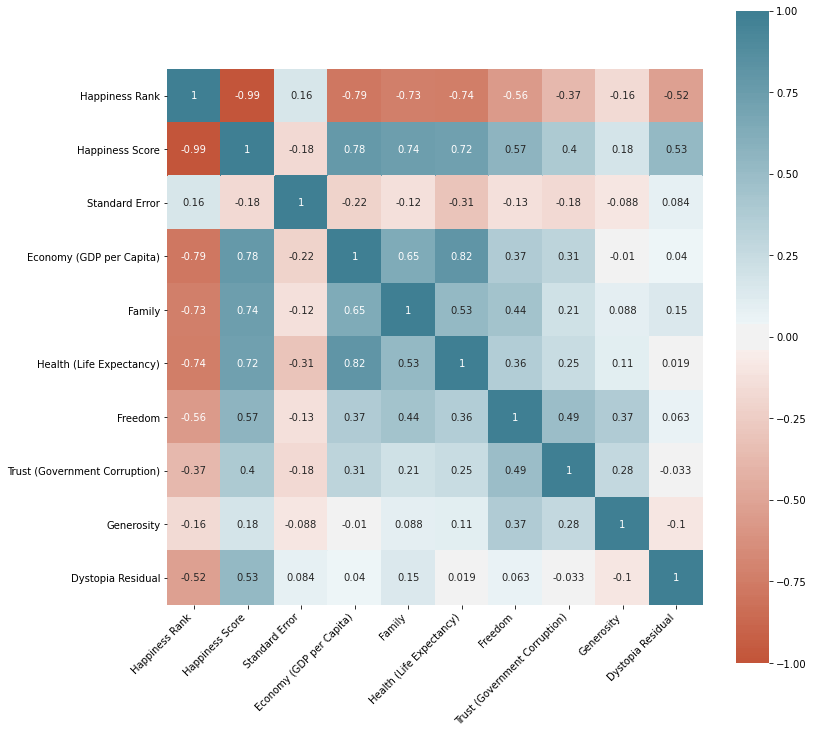

In [137]:
corr = data2015.corr()

figure = plt.figure(figsize = (12,12))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, center = 0,
                 cmap = sns.diverging_palette(20,220, n = 200), square = True,
                 annot = True)

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation = 45,
                   horizontalalignment = 'right');

In [140]:
corr['Happiness Score'].sort_values(ascending = False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

The highest correlated features to the Happiness Score are Economy, Family, and Health

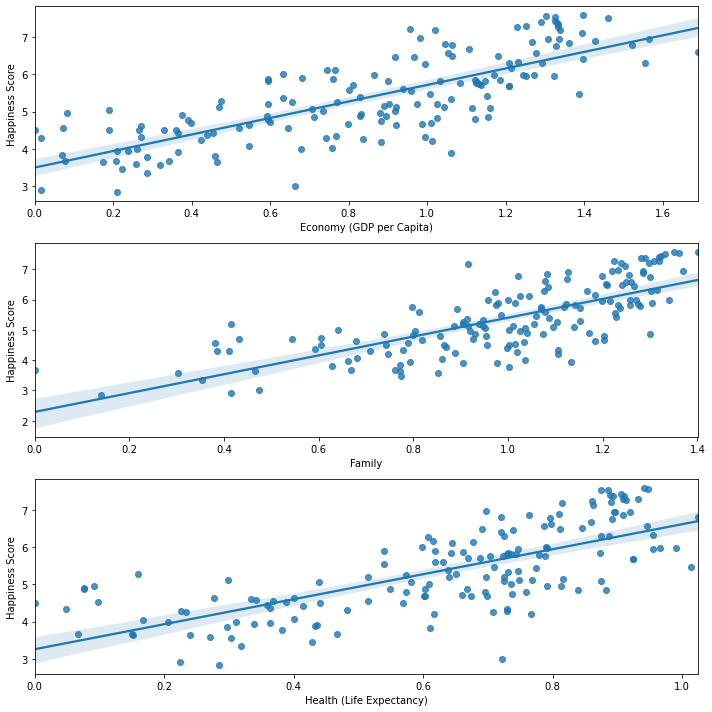

In [201]:
fig = plt.figure(figsize = (10, 10))

fig.add_subplot(3, 1, 1)
sns.regplot(x = 'Economy (GDP per Capita)', y = 'Happiness Score', data = data2015)

fig.add_subplot(3, 1, 2)
sns.regplot(x = 'Family', y = 'Happiness Score', data = data2015)

fig.add_subplot(3, 1, 3)
sns.regplot(x = 'Health (Life Expectancy)', y = 'Happiness Score', data = data2015)

plt.tight_layout()
plt.show()


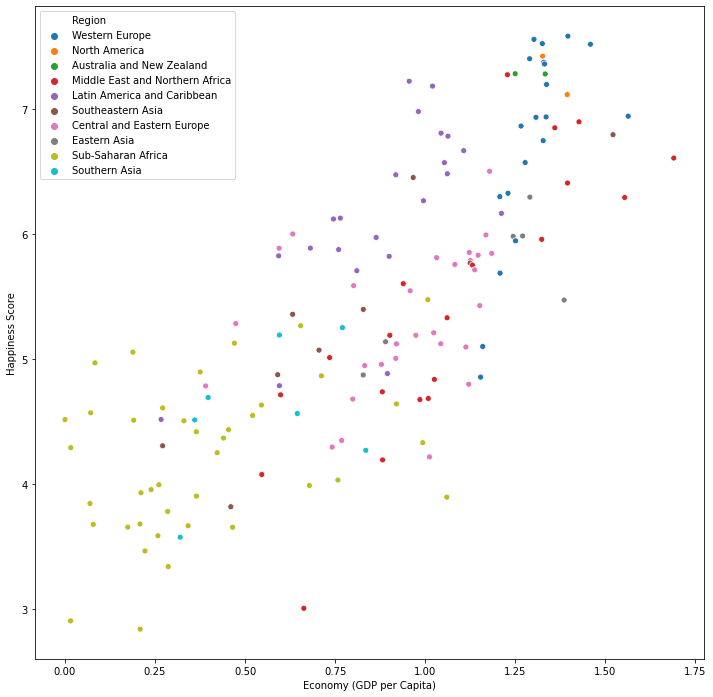

In [167]:
fig = plt.figure(figsize = (12,12))

sns.scatterplot(x = 'Economy (GDP per Capita)', y = 'Happiness Score', hue = 'Region', data = data2015,
                )

plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

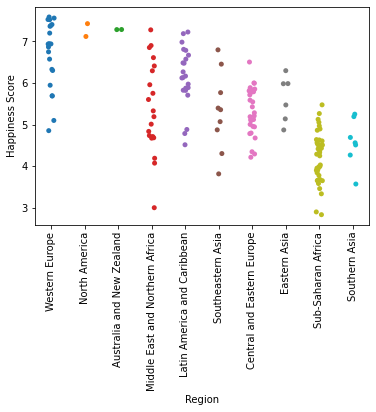

In [171]:
#Happiness by region
pt = sns.stripplot(x = "Region", y = "Happiness Score", data = data2015)
plt.xticks(rotation = 90)

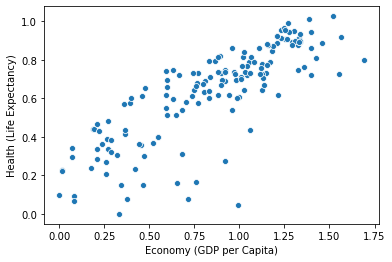

In [203]:
sns.scatterplot(x = data2015['Economy (GDP per Capita)'], y = data2015['Health (Life Expectancy)']);